# Graphes aléatoires et graphes réels

Dans ce TP, nous allons explorer certaines propriétés globales des graphes avec comme objectif de mieux comprendre la structure de certains graphes sociaux, graphes de réseaux comme Facebook, twitter, graphes de relations professionnelles, graphes des acteurs ayant joué dans le même film etc.
Le déroulement du TP consiste à: 
1. présenter tout d'abord quelques algorithmes pour générer des **graphes aléatoires**. Selon le type d'algorithmes, les propriétés attendus du graphe seront différentes.
2. proposer des **métriques** ou descripteurs globaux de graphes qui nous renseignent sur l'organisation générale. Par exemple, une question légitime qu'on peut se poser est "combien y-a-il en moyenne de liens entre deux noeuds pris au hasard dans le graphe ?"
3. étudier quelques **graphes réels** en calculant les descripteurs précédents et en se posant la question d'à quel point les algorithmes de génération de graphe reflètent ou non ce qu'on observe dans la vraie vie

Dans ce TP on considèrera essentiellement des graphes non dirigés. Pour un graphe à $n$ noeuds on identifiera un noeud avec un indice entre $0$ et $n-1$

# 1. Utilisation de la librairie networkx

Pour ce TP nous utiliserons la librairie python `networkx` qui dispose d'un grand nombre de fonctionnalités: structure de données adaptées, algorithmes standards, génération aléatoire de graphes, descripteurs et visualisation

1. Pour savoir si `networkx` a été installé vous pouvez tenter d'éxécuter le bloc suivant

In [264]:
import networkx as nx
def graphComplet(n):
    G = nx.Graph()
    for i in range(n):
        G.add_node(i)
        for j in range(i+1,n):
            G.add_edge(i, j)    
    return G
print(graphComplet(4))

Graph with 4 nodes and 6 edges


S'il y a une erreur, installez la librairie en exécutant la commande suivante dans un terminal

`/opt/anaconda3/bin/pip install --user networkx`

2. La documentation de `networkx` comporte de nombreux exemples. En utilisant le tutorial https://networkx.org/documentation/stable/tutorial.html écrivez une fonction qui génère un graphe complet avec `n` sommets. Vous n'avez besoin que de savoir comment:
- instancier un graphe vide non dirigé (par défaut dans `networkx`)
- comment ajouter une nouvelle arête

3. Faites de même avec un graphe ligne à $n$ sommets.

In [265]:
def graphLigne(n):
    G = nx.Graph()
    for i in range(n):
        G.add_node(i)
    for j in range(n-1):
        G.add_edge(j, j+1)   
     
    return G
print(graphLigne(4))


Graph with 4 nodes and 3 edges


4. Toujours en vous aidant du tutorial, affichez un graphe complet à 10 sommets et un graphe ligne à 10 sommets.

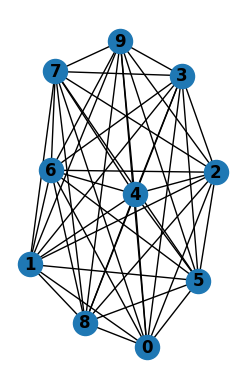

In [266]:
import matplotlib.pyplot as plt
graphComplet = graphComplet(10)
subax1 = plt.subplot(121)
nx.draw(graphComplet, with_labels=True, font_weight='bold')

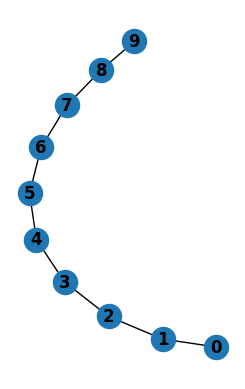

In [267]:


graphLigne = graphLigne(10)
#print("graphLigne =", graphLigne)
subax2 = plt.subplot(121)
nx.draw(graphLigne, with_labels=True, font_weight='bold')

# 2. Métriques de graphe

## Degrés

1. Ecrire une fonction qui renvoie la liste des degrés des noeuds. Vous utiliserez la méthode `degree` d'un objet graphe.

In [268]:
def listDegrees(graph):
    liste=[] 
    for i in graph.degree():
        liste.append(i[1])
    return liste

print("graphe Complet : {}".format(listDegrees(graphComplet)))
print("graphe Ligne : {}".format(listDegrees(graphLigne)))




graphe Complet : [9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
graphe Ligne : [1, 2, 2, 2, 2, 2, 2, 2, 2, 1]


On donne ci-après une fonction qui calcule et affiche la distribution des degrés d'un graphe. 

In [269]:
import numpy as np
import matplotlib.pyplot as plt

def plot_histo(x,name_x="Degrees",scale=None):
    bins = [v for v in range(min(x),max(x)+2)]
    n,b = np.histogram(x,bins=bins) 
    if scale == "log":
        x = np.log10(bins[0:-1])
        y = np.log10(n)
        name_x = scale+" "+name_x
    else:
        x = (bins[0:-1])
        y = n
    plt.bar(x,y)
    plt.xlabel(name_x)
    plt.ylabel("Number of nodes")
    
    return x,y


2. Affichez la distribution des degrés pour le graphe ligne et vérifiez que tout est cohérent.

([1, 2], array([2, 8], dtype=int64))

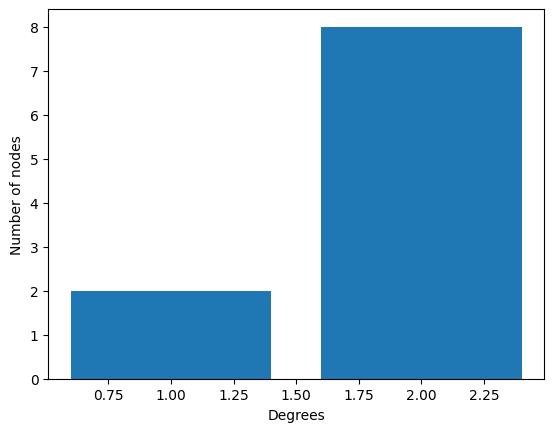

In [270]:
plot_histo(listDegrees(graphLigne))


([9], array([10], dtype=int64))

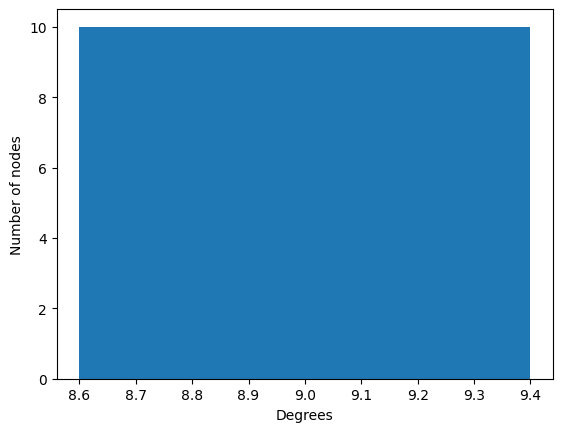

In [271]:
plot_histo(listDegrees(graphComplet))

## Chemins

3. Ecrire une fonction qui renvoie la matrice d'adjacence d'un graphe. La matrice $A$ sera représentée comme une liste de listes de longueur $n$. Ainsi pour $i$ et $j$ deux noeuds du graphe, $A[i][j]$ vaudra 1 si $i$ et $j$ sont voisins et 0 sinon. **Par commodité dans la suite, on remplacera la valeur $0$ par $\infty$.**

In [272]:
import math
def matrice_adjacence(graph):
    variable_number_of_nodes= graph.number_of_nodes()
    liste = []
    for i in range(variable_number_of_nodes):
        liste.append([])
        for j in range(variable_number_of_nodes):
            liste[i].append(math.inf)

    for i in range(variable_number_of_nodes):
        for j in graph.neighbors(i):
            liste[i][j] = 1
    return liste

def printMatrice(m):
    for p in m:
        print(p)     

#print("matrice_adjacence: ",matrice_adjacence(graphComplet))
print("matrice_adjacence(graphComplet)")
print()
printMatrice(matrice_adjacence(graphComplet))
#print("graphLigne: ",matrice_adjacence(graphLigne))
print("=================================================")
print("matrice_adjacence(graphLigne)")
print()
printMatrice(matrice_adjacence(graphLigne))

 


matrice_adjacence(graphComplet)

[inf, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, inf, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, inf, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, inf, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, inf, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, inf, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, inf, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, inf, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, inf, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, inf]
matrice_adjacence(graphLigne)

[inf, 1, inf, inf, inf, inf, inf, inf, inf, inf]
[1, inf, 1, inf, inf, inf, inf, inf, inf, inf]
[inf, 1, inf, 1, inf, inf, inf, inf, inf, inf]
[inf, inf, 1, inf, 1, inf, inf, inf, inf, inf]
[inf, inf, inf, 1, inf, 1, inf, inf, inf, inf]
[inf, inf, inf, inf, 1, inf, 1, inf, inf, inf]
[inf, inf, inf, inf, inf, 1, inf, 1, inf, inf]
[inf, inf, inf, inf, inf, inf, 1, inf, 1, inf]
[inf, inf, inf, inf, inf, inf, inf, 1, inf, 1]
[inf, inf, inf, inf, inf, inf, inf, inf, 1, inf]


4. Ecrire votre propre implémentation de l'algorithme de Floyd-Warshall. 

In [273]:
def matrice_Floyd_Warshall(graph):
    matriceAdj = matrice_adjacence(graph)
    
    for k in range(graph.number_of_nodes()):
        for i in range(graph.number_of_nodes()):
            for j in range(graph.number_of_nodes()):
                matriceAdj[i][j]=min(matriceAdj[i][j],matriceAdj[i][k]+matriceAdj[k][j])
    return matriceAdj

print("matrice_Floyd_Warshall(graphComplet)\n")
printMatrice(matrice_Floyd_Warshall(graphComplet))
print()
print("matrice_Floyd_Warshall(graphLigne) \n")
printMatrice(matrice_Floyd_Warshall(graphLigne))

matrice_Floyd_Warshall(graphComplet)

[2, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 2, 1, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 2, 1, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 2, 1, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 2, 1, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 2, 1, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 2, 1, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 2, 1, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 2, 1]
[1, 1, 1, 1, 1, 1, 1, 1, 1, 2]

matrice_Floyd_Warshall(graphLigne) 

[2, 1, 2, 3, 4, 5, 6, 7, 8, 9]
[1, 2, 1, 2, 3, 4, 5, 6, 7, 8]
[2, 1, 2, 1, 2, 3, 4, 5, 6, 7]
[3, 2, 1, 2, 1, 2, 3, 4, 5, 6]
[4, 3, 2, 1, 2, 1, 2, 3, 4, 5]
[5, 4, 3, 2, 1, 2, 1, 2, 3, 4]
[6, 5, 4, 3, 2, 1, 2, 1, 2, 3]
[7, 6, 5, 4, 3, 2, 1, 2, 1, 2]
[8, 7, 6, 5, 4, 3, 2, 1, 2, 1]
[9, 8, 7, 6, 5, 4, 3, 2, 1, 2]


5. Ecrire une fonction qui donne la métrique "average shortest path length" dont on redonne la formule
$$ \frac{1}{n(n-1)} \sum_{i \neq j} d(i,j) $$
où $d(i,j)$ correspond à la distance du plus court chemin entre les noeuds $i$ et $j$. S'il existe deux noeuds non connectés, la fonction renverra $+\infty$.

6. Calculez cette métrique pour un graphe complet et un graphe ligne

# 3. Génération aléatoire de graphe

## Modèle d'Erdös-Renyi

1. Ecrire une fonction qui génère un graphe aléatoire $G(n,p)$ via le modèle de Erdös-Rényi. 

On rappelle que dans ce modèle, le graphe obtenu est non dirigé. On partira d'un graphe vide et chacune des $n(n-1)/2$ arrêtes sera présente avec une probabilité $p$.

2. Sur la même figure, visualisez une petite dizaine de graphes aléatoires obtenus avec $n=20$ et $p$ variant entre $0.01$ et $1$. Quelle observation majeure faites vous ?

*Indication: vous utiliserez subplot dans matplolib.pyplot*

3. Refaites l'exercice précédent en fixant cette fois $n$ et $p$. Que constatez vous ?

Pour aller un peu plus loin, essayer de trouver une valeur approximative de $p$ pour laquelle les graphes sont obtenus sont parfois connexes ou non.

4. `networkx` propose des algorithmes de génération de graphes https://networkx.org/documentation/stable/reference/generators.html

Comparez visuellement votre implémentation et celle de networkx avec quelques exemples bien choisis

5. Calculez la métrique "average shortest path length" pour plusieurs graphes aléatoires obtenus avec différentes valeurs de $p$. Affichez les valeurs en fonction de $p$. Qu'observe-t-on ? Est ce surprenant ?

6. Vous remarquerez que le temps de calcul du "average shortest path length" devient prohibitif au delà de $n=500$. Ecrire une fonction qui calcule une distance moyenne approchée en prenant N paires de sommets différents, avec $N$ petit par rapport à $n(n-1)/2$ (typiquement $N$ de l'ordre de $n$) et en faisant la moyenne des $N$ longueurs de plus court chemin obtenu. Pour obtenir des sommets aléatoires distincts vous pourrez utiliser la fonction `shuffle` de la librairie `rand` qui permute aléatoirement une liste. 

7. Vérifiez que la valeur obtenue n'est pas très éloignée de la vraie valeur obtenue sur des graphes aléatoires pas trop gros.

## Autres modèles

Les algorithmes de Barabasi-Albert et Watts et Strogatz prendraient un peu trop de temps à implémenter en TP, du fait de quelques petits détails techniques. De plus ils sont implémentés dans la librairie `networkx`, alors autant l'utiliser !

8. Recherchez la documentation sur l'algorithme de Barabasi-Albert et générez plusieurs graphes avec un paramètre $n$ fixé (inférieur à 1000) et $m$ qui peut varier. En pratique, $m$ est proche du degré moyen du graphe.

9. Faites de même sur l'algorithme de Watts et Strogatz.

# 4. Données réelles

## Réseau réel

Dans la suite vous allez travailler sur un sous-graphe du graphe de Facebook, comprenant environ 4000 noeuds.
https://snap.stanford.edu/data/egonets-Facebook.html


1. Regardez le fichier facebook_combined.txt et la façon dont sont stockées les informations sur le graphe. Importer le graphe en utilisant une des fonctions disponibles ici https://networkx.org/documentation/stable/reference/readwrite/index.html.

Vous pourrez ensuite afficher le graphe à l'aide du script suivant en prenant soin de comprendre à quoi correspondent les couleurs et la taille des ronds.

In [274]:
pos = nx.spring_layout(G_fb) # Prend 30s-1min

NameError: name 'G_fb' is not defined

In [ ]:
node_color = [0.1*v  for v in nx.clustering(G_fb)]
node_size =  [v  for v in degres(G_fb)]
plt.figure(figsize=(15,10))
nx.draw_networkx(G_fb, pos=pos, with_labels=False,
                 node_color=node_color,
                 node_size=node_size )
plt.axis('off')

2. Affichez la distribution des degrés et calculez le degré moyen du graphe $\bar{k}$ qui servira ensuite.

## Comparaison avec des graphes aléatoires

3. Générez des graphes aléatoires (Erdös-Reniy, Watts-Strogatz, Barabasi-Albert) en veillant à utiliser des paramètres cohérents avec le réseau de Facebook. On rappelle ainsi que :
- dans Erdös-Renyi, $np$ est égal au degré moyen du graphe
- dans Watts-Strogatz, le nombre de voisins de l'anneau initial peut être pris égal au degré moyen du graphe Facebook $\bar{k}$. La probabilité de recablage $p$ doit en revanche être déterminée empiriquement.
- dans Barabasi-Albert, on pourra prendre $m$ égal à $\bar{k}$. 

4. Sur une même figure, représentez la distribution des degrés des 4 graphes. Qu'en concluez vous ?

5. Calculez pour chacun des 4 graphes 
- La moyenne des plus courts chemins
- Le degré moyen
- Le coefficient de clustering moyen ( `average_clustering` )

Conclure.